# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [329]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

data = pd.read_csv('../data/spam_or_not_spam.csv')
display(data)
print(data['label'].value_counts())

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


0    2500
1     500
Name: label, dtype: int64


In [330]:
# рассчитайте частоты для классов 
print('Частота для (не спам/спам) писем:')
print(data['label'].value_counts()/len(data['label']))

Частота для (не спам/спам) писем:
0    0.833333
1    0.166667
Name: label, dtype: float64


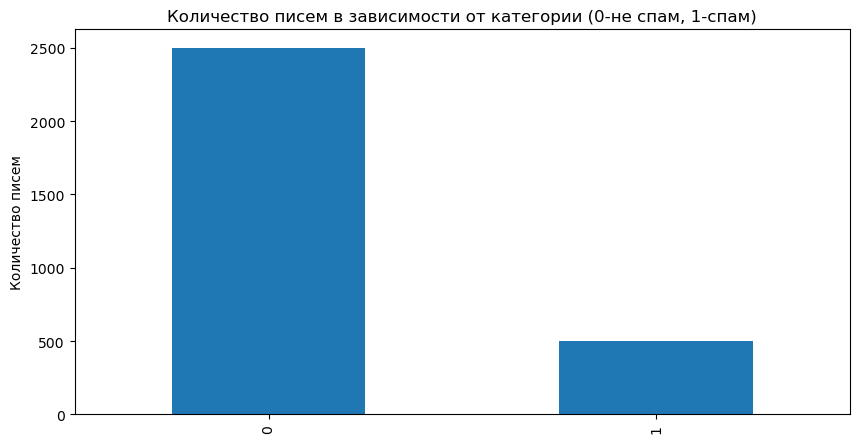

In [331]:
ax = data['label'].value_counts().plot(kind='bar', figsize=(10, 5)) 
ax.set_title('Количество писем в зависимости от категории (0-не спам, 1-спам)') 
ax.set_ylabel('Количество писем'); 

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [332]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [333]:
data['email'] = data['email'].apply(lambda x: np.nan if x=='' or x==' ' else x)
data = data.dropna()
#display(data)

Переводим данные в векторный вид:

In [334]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["email"])
display(X.shape)
display(X)

(2997, 34116)

<2997x34116 sparse matrix of type '<class 'numpy.int64'>'
	with 348376 stored elements in Compressed Sparse Row format>

Определите, сколько теперь признаков в нашем наборе данных:

In [335]:
print('Количество признаков после предобработки данных: ', X.shape[1])

Количество признаков после предобработки данных:  34116


## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [336]:
# X - матрица признаков
y = data['label'] # целевая переменная

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, stratify=y, random_state=42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [338]:
print('Среднее значение целевой переменной по тестовой выборке: ', y_test.mean())

Среднее значение целевой переменной по тестовой выборке:  0.16533333333333333


## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [339]:
from sklearn.naive_bayes import ComplementNB
clf = ComplementNB(alpha=0.01)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [340]:
print("Тренировочная выборка:", '\n', sklearn.metrics.classification_report(y_train, y_train_pred))
print("Тестовая выборка:", '\n', sklearn.metrics.classification_report(y_test, y_test_pred))
print('accuracy = ', sklearn.metrics.accuracy_score(y_test, y_test_pred))
print('precision = ', sklearn.metrics.precision_score(y_test, y_test_pred))

Тренировочная выборка: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1874
           1       1.00      1.00      1.00       373

    accuracy                           1.00      2247
   macro avg       1.00      1.00      1.00      2247
weighted avg       1.00      1.00      1.00      2247

Тестовая выборка: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       626
           1       1.00      0.93      0.96       124

    accuracy                           0.99       750
   macro avg       0.99      0.96      0.98       750
weighted avg       0.99      0.99      0.99       750

accuracy =  0.988
precision =  1.0


* Оценивая на тестовой выборке метрику accuracy = 0.988, можем сказать, что точность предсказания модели составляет 98.8%
* Метрика precision = 1, говорит нам, что у модели отсутствуют ложноположительные срабатывания.
* recall = 0.93, говорит, что 93% писем определенные моделью как спам, действительно являются спамом.
* Т.к. метрики precision=1 и recall=0.93 - имеют хорошие показатели (близкие к единице), то метрика f1 = 0.96, представаляющая собой взвешенное среднее гармоническое этих метрик, так же имеет хорошее значение.

Нарисуйте ROC-кривую:

auc =  0.9950659589817583


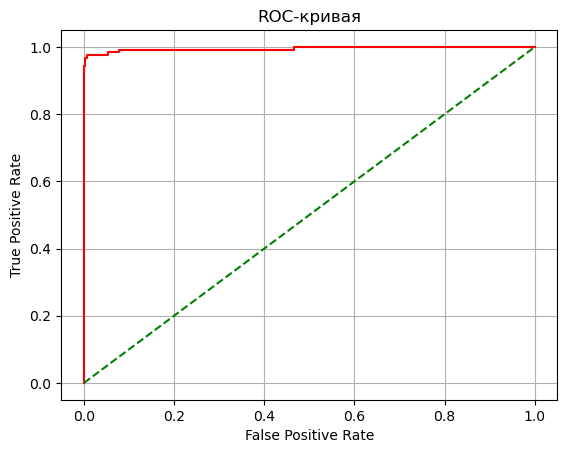

In [341]:
y_pred_proba = clf.predict_proba (X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print('auc = ', auc)
#create ROC curve
plt.plot (fpr,tpr, color='red')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC-кривая')
plt.grid (True)
plt.show() 

Площадь под кривой близка к единице (auc = 0.99), это значит, что модель хорошо справляется с классификацией данных по категориям (спам/не спам)

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [342]:
from sklearn.model_selection import GridSearchCV

alpha = {'alpha': list(np.linspace(0.01, 1, 100, dtype=float))}

grid_search = GridSearchCV(
    estimator=ComplementNB(),
    param_grid=alpha, 
    cv=5, 
    n_jobs = -1
)

grid_search.fit(X_train, y_train) 
print("Наилучшие значения параметров: {}".format(grid_search.best_params_))

clf = ComplementNB(alpha=0.34)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print("Тренировочная выборка:", '\n', sklearn.metrics.classification_report(y_train, y_train_pred))
print("Тестовая выборка:", '\n', sklearn.metrics.classification_report(y_test, y_test_pred))
print('accuracy = ', sklearn.metrics.accuracy_score(y_test, y_test_pred))
print('precision = ', sklearn.metrics.precision_score(y_test, y_test_pred))

Наилучшие значения параметров: {'alpha': 0.34}
Тренировочная выборка: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1874
           1       1.00      0.99      1.00       373

    accuracy                           1.00      2247
   macro avg       1.00      1.00      1.00      2247
weighted avg       1.00      1.00      1.00      2247

Тестовая выборка: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       626
           1       0.99      0.98      0.98       124

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750

accuracy =  0.9946666666666667
precision =  0.9918032786885246


Определив лучшее значение параметра alpha = 0.34 мы смогли улучшить модель классификации текстов ComplementNB.
* Точность предсказания модели возросла до 99.4% ( accuracy = 0.994)
* Незначительное количество ложноположительных срабатываний, - значение precision близко к единице (precision =  0.99)
* 98% писем определенных как спам, действительно являются спамом (recall = 0.98)
